## Regresión Lineal 2

Vamos a ver un segundo ejemplo de la técnica de regresión lineal. Recordamos que el objetivo es encontrar los parámetros de la curva que relacionan las variables de entrada con la variable que queremos predecir. Como estamos hablando de regresión LINEAL, la curva tendrá la forma y = ax + bz + cw + ... Siendo y el resultado que buscamos, x, y y w las variables de entrada y a,b y c los parámetros. Es decir, todos las variables tienen grado 1. Si hubiera una variable con un grado superior hablaríamos de regresión polinómica.

En el caso especial de que solo dependa de una variable de entrada el problema se llama REGRESIÓN LINEAL SIMPLE. 

En el ejercicio de hoy vamos a resolver un problema de regresión lineal simple. Tenemos un dataset que relaciona dos variables, el salario y la experiencia de los trabajadores. El salario es la variable resultado (y), mientras que la experiencia es el dato de entrada (x). El objetivo es poder predecir el salario en función de la experiencia. Para ello obtendremos mediante la técnica de regresión lineal la fórmula y=ax+b. a y b son los parámetros que nuestro sistema debe encontrar.

Sigue los pasos indicados con el profesor:

Lo primero que debes hacer es importar el csv en un DataFrame y lanzar la matriz de correlación. Recordamos que la matriz de correlación nos sirve para buscar relaciones lineales entre variables. 
1. Importa el csv con los datos.
2. Pinta la matriz de correlación.

In [38]:
import pandas as pd

## Importa el CSV
df_salary = pd.read_csv('Salary.csv', sep=",")

## Muestra la matriz de correlación
df_salary.corr(numeric_only=True)["Salary"]

# Viendo esto, el salario tiene que ver de forma casi lineal con la experiencia (años).

YearsExperience    0.982427
Salary             1.000000
Name: Salary, dtype: float64

Los dataframes tienen un método llamado describe() que nos da información estadística de los datos columna a columna. 

También dispones de un método para ver la relación lineal entre las variables llamado pairplot(dataframe) perteneciente al paquete seaborn. 

3. Utiliza el método describe() para analizar los datos que tenemos.
4. Utiliza pairplot y analiza el resultado.

In [39]:
## Utiliza el metodo describe
df_salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


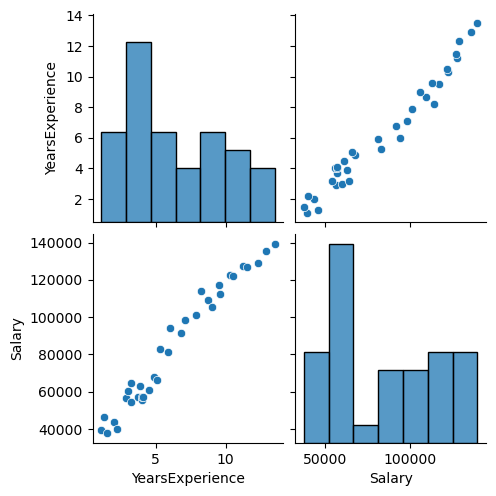

In [40]:
# Utiliza pairplot y analiza el resultado
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_salary)

# Viendo el resultado podremos dictaminar que 

Para poder sacar los parámetros debemos definir la variable de entrada (x) y la de salida (y). Puedes usar el método to_list() del resultado para generar una lista. 

5. Asigna a la variable X los datos de la columna YearsExperience y a y los de la columna Salary. Pinta los datos obtenidos.

In [41]:
X = df_salary["YearsExperience"].to_frame()
y = df_salary["Salary"].to_frame()

print(X.shape)
print(y.shape)

(35, 1)
(35, 1)


Después vamos a generar el set de datos de entrenamiento y el de test. Para ello vamos a utilizar la función train_test_split de sklearn con un test_size del 33%.

6. Genera las listas X_train, X_test, y_train e y_test usando train_test_split. Debes dejar un 33% de datos de test.  

In [42]:
# Librerias para crear el modelo y normalizar datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
escalado = StandardScaler()
#X = escalado.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

Una vez obtenidos los conjuntos de datos para entrenamiento y test debemos entrenar el modelo para sacar los parámetros.

7. Entrena el modelo importando LinearRegression de sklearn.linear_model. Tienes que generar el objeto LinearRegression y usar el método fit con los datos de entrenamiento.

In [37]:
# Entrenando el modelo
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Ahora ya deberías poder entrenar tu modelo.

10. Entrena el modelo para sacar los parámetros como hiciste en el punto 7.

In [44]:
# Vamos a sacar los coeficientes, este coeficiente indica cual es el salario (es alto porque no se ha normalizado)
lr.coef_

array([[8692.01316868]])

In [45]:
# 
lr.intercept_

array([29974.33208827])

Hemos creado un objeto, lm, que tendrá los atributos y métodos que necesitamos para conseguir el resultado. En sus atributos estarán los coeficientes del resultado, por ejemplo, y tiene métodos para calcular con la función resultante predicciones con datos de entrada nuevos. Ahora vamos a ver que coeficiente (parámetros del modelo) tiene cada una de las columnas analizada. Para ello vamos a meter los coeficientes en un DataFrame.

11. Obtén los parámetros que ha sacado el modelo con el método coef_. ¿Cuantos parámetros aparecen? ¿Cuantos esperabas? 

In [ ]:
# Vamos a sacar los coeficientes, este coeficiente indica cual es el salario (es alto porque no se ha normalizado)
lr.coef_

array([[8692.01316868]])

El parámetro que has obtenido es el término que multiplica a X. Es decir, en la fórmula y=ax+b has obtenido a. El modelo también ha calculado b pero en vez de parámetro lo llama "intercept".

12. Obtén el término independiente de la fórmula con el atributo intercept_

¿Hemos conseguido un resultado bueno? Para eso tenemos guardado el set de test (y_test). Vamos a calcular los valores que predice nuestro modelo para los datos de test y comprobar si se parecen a las resultados reales, es decir, a los salarios que tenía el dataset. Para ello calculamos el error cuadrático medio.

13. Calcula mediante el método predict(X_test) los valores y_pred que se generan usando el modelo entrenado para los datos de entrada de test. Compáralos haciendo el Error Cuadrático Medio como se hizo en el primer ejemplo de regresión lineal.

Ahora vamos a pintar los datos esperados y los datos calculados.

14. Pinta con scatter y_test frente a X_test y con plot y_pred frente a X_test.

Vamos ahora a ver el coeficiente R cuadrado para ver si tenemos mucho error o poco error.

15. Calcula el coeficiente R cuadrado importando 'from sklearn.metrics import r2_score'